# Les espaces de couleurs
Présentation des espaces RGB, Lab et HSV et conversion d'un espace à un autre.

## 1. Présentation des espaces

### 1.1 RGB (Red, Green, Blue) ou RVB
- **Description** : espace additif avec 3 canaux R, G et B où les couleurs sont créées en combinant des lumières rouges, vertes et bleues de différentes intensités, C = R + G + B. 
- **Usage** : Couramment utilisé dans les écrans LCD et la plupart des formats d'images numériques.  
![RGB](fig/RGB.png)

### 1.2 Lab (CIELAB)  
- **Description** : espace de couleurs conçu pour être perceptuellement uniforme, les différences de couleur perçues par l'œil humain sont proportionnelles aux distances dans l'espace de couleurs. 3 grandeurs caractéristiques, la clarté L* qui dérive de la luminance et les composantes a* et b* qui expriment l'écart de la couleur par rapport à une surface grise de même clarté.   
- **Usage** : Utilisé en vision par ordinateur pour des opérations de segmentation et de reconnaissance d'objets.  
![CIELAB](fig/CIELAB.png)

### 1.3 HSV (Hue, Saturation, Value) ou TSV
- **Description** : espace qui représente les couleurs en termes de teinte, saturation et valeur.  
La teinte est codée suivant l'angle correspondant sur le cercle des couleurs. La saturation en pourcentage définit l'intensité de la couleur. La valeur également en pourcentage représente la brillance : 0% étant du noir.  
Cet espace est souvent utilisé parce qu'il est intuitif pour l'homme d'y décrire et manipuler les couleurs.  
- **Usage** : Utilisé dans les applications de retouche d'image, les sélecteurs de couleur et en vision par ordinateur pour la segmentation basée sur la couleur.
![HSV](fig/HSV.png)

## 2. Conversion d'un espace à un autre
Voir les bibliothèques `scikit-image` et `kornia` 

In [2]:
from skimage import io, color
import numpy as np
import torch
import kornia
import matplotlib.pyplot as plt

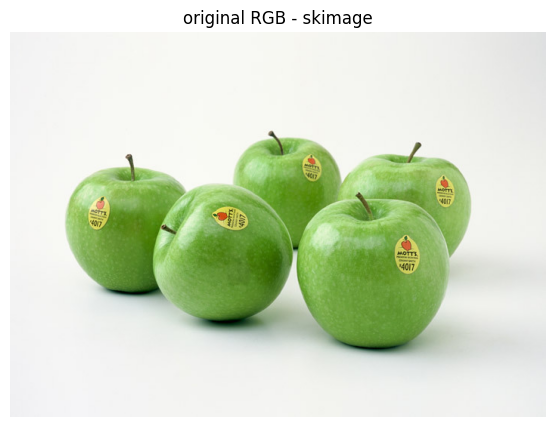

In [3]:
# Charger une image en RGB
img_rgb = io.imread('fig/apple.jpeg')
r = img_rgb[:,:,0]
g = img_rgb[:,:,1]
b = img_rgb[:,:,2]

# Affichage
fig = plt.figure(figsize=(7,5))
plt.title('original RGB - skimage')
plt.axis('off')
plt.imshow(img_rgb)
plt.show()

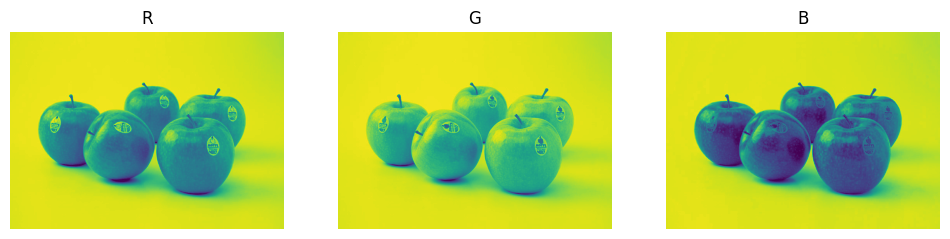

In [3]:
fig = plt.figure(figsize=(12,8))

# Affichage couche rouge 
plt.subplot(131)
plt.title('R')
plt.axis('off')
plt.imshow(r)

# Affichage couche verte 
plt.subplot(132)
plt.title('G')
plt.axis('off')
plt.imshow(g)

# Affichage couche bleue 
plt.subplot(133)
plt.title('B')
plt.axis('off')
plt.imshow(b)
plt.show()

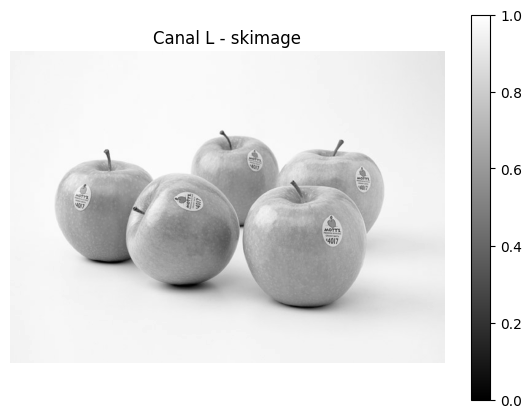

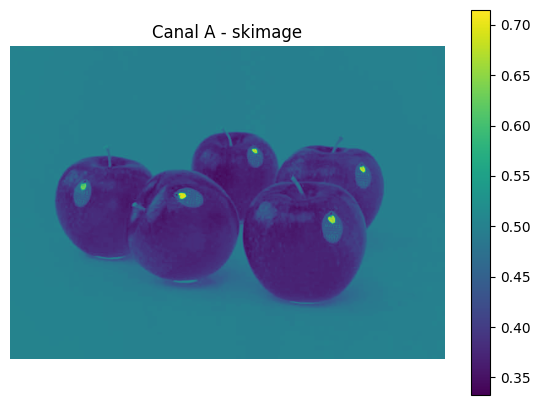

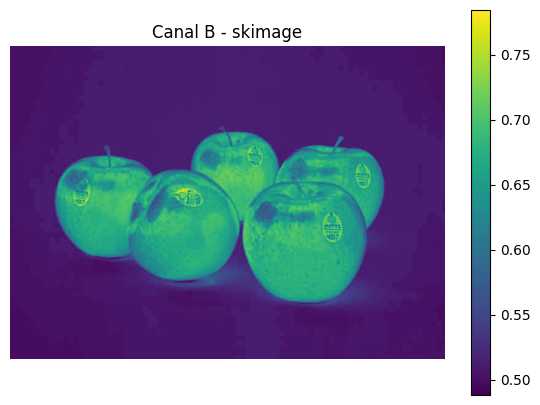

In [18]:
# RGB -> Lab
img_lab = color.rgb2lab(img_rgb)

#Normalisation de l'espace de couleur Lab
L = img_lab[:, :, 0] / 100  # Normaliser L* à [0, 1]
a = (img_lab[:, :, 1] + 128) / 255  # Normaliser a* à [0, 1]
b = (img_lab[:, :, 2] + 128) / 255  # Normaliser b* à [0, 1]

# Fonction pour afficher un canal avec une colorbar
def show_channel(channel, cmap, title):
    plt.figure(figsize=(7, 5))
    plt.imshow(channel, cmap=cmap)
    plt.colorbar()
    plt.title(title)
    plt.axis('off')
    plt.show()

# Afficher les canaux séparément
show_channel(L, cmap='gray', title='Canal L - skimage')
show_channel(a, cmap='viridis', title='Canal A - skimage')
show_channel(b, cmap='viridis', title='Canal B - skimage')

# # Affichage
# plt.title('Lab from RGB - skimage')
# plt.axis('off')
# plt.imshow(img_lab_) # n'a pas de sens car convention RGB pour l'affichage
# plt.show()

From RGB to HSV - skimage


TypeError: Invalid shape (1, 3, 500) for image data

<Figure size 700x500 with 0 Axes>

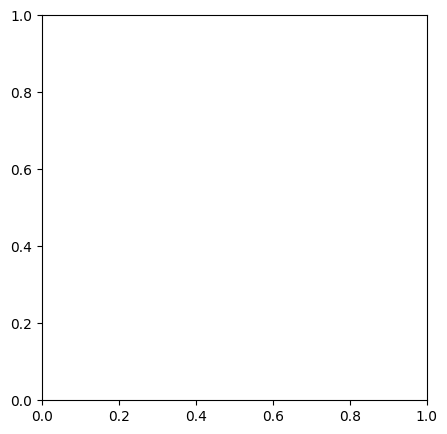

In [19]:
# RGB -> HSV
img_hsv = color.rgb2hsv(img_rgb)
fig = plt.figure(figsize=(7,5))

print('From RGB to HSV - skimage')
# Afficher les canaux séparément
show_channel(image_hsv[:, :, 0], cmap='hsv', title='Canal H - skimage')
show_channel(image_hsv[:, :, 1], cmap='viridis', title='Canal S - skimage')
show_channel(image_hsv[:, :, 2], cmap='gray', title='Canal V - skimage')

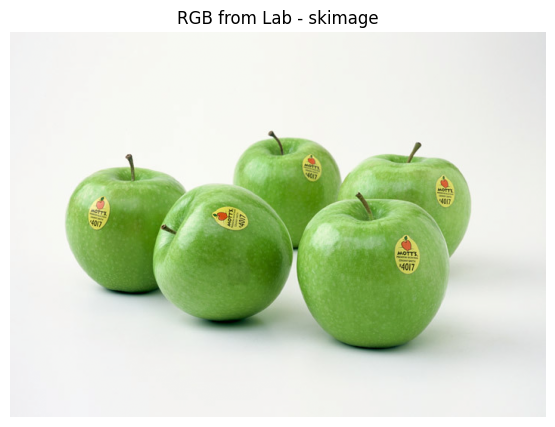

In [6]:
# Lab -> RGB
img_rgb_from_lab = color.lab2rgb(img_lab)
fig = plt.figure(figsize=(7,5))

# Affichage
plt.title('RGB from Lab - skimage')
plt.axis('off')
plt.imshow(img_rgb_from_lab)
plt.show()

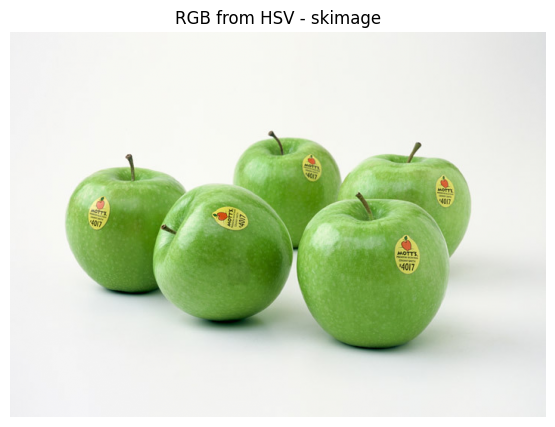

In [7]:
# HSV -> RGB
img_rgb_from_hsv = color.hsv2rgb(img_hsv)
fig = plt.figure(figsize=(7,5))

# Affichage
plt.title('RGB from HSV - skimage')
plt.axis('off')
plt.imshow(img_rgb_from_hsv)
plt.show()

### Bibliothèque 'kornia' (PyTorch)

torch.Size([375, 500, 3])


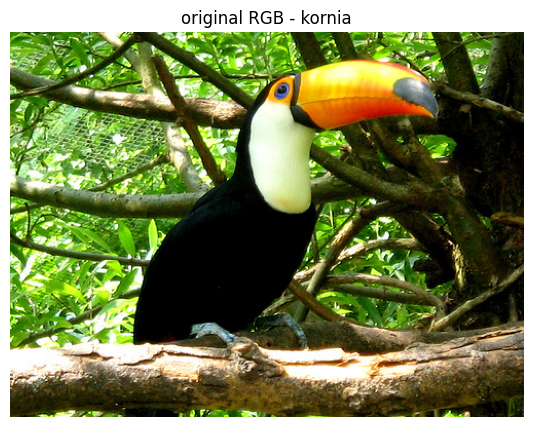

In [7]:
# Charger une image RGB (les valeurs doivent être entre 0 et 1)
image_rgb = io.imread('fig/pelican.jpeg')
image_rgb = torch.from_numpy(image_rgb).float() / 255.0
print(image_rgb.size())

#Affichage
fig = plt.figure(figsize=(7,5))
plt.title('original RGB - kornia')
plt.axis('off')
plt.imshow(image_rgb)
plt.show()

From RGB to Lab


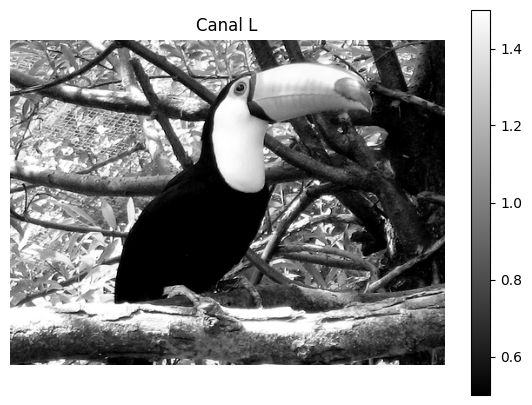

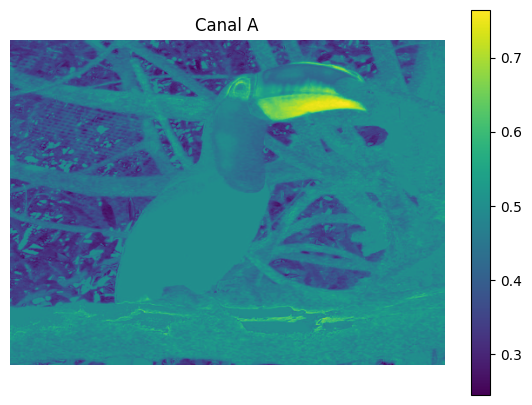

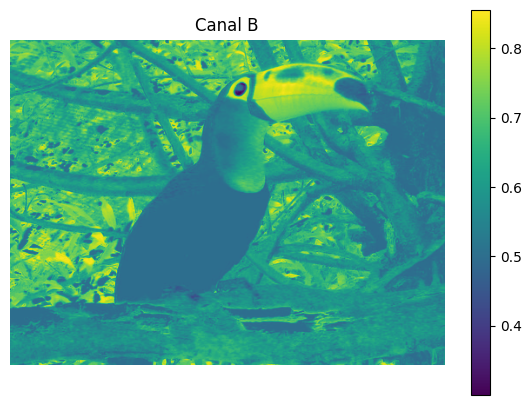

In [13]:
# RGB -> Lab
image_rgb_ = image_rgb.permute(2, 0, 1).unsqueeze(0)
image_lab = kornia.color.rgb_to_lab(image_rgb_)

# Normaliser les valeurs Lab pour l'affichage
L, a, b = image_lab[0].chunk(3, 0)

L = (L + 50) / 100  # Normalisation des valeurs L* de [-50, 50] à [0, 1]
a = (a + 128) / 256  # Normalisation des valeurs a* de [-128, 128] à [0, 1]
b = (b + 128) / 256  # Normalisation des valeurs b* de [-128, 128] à [0, 1]

print('From RGB to Lab')

# Afficher les canaux séparément
show_channel(L.squeeze(0), cmap='gray', title='Canal L - kornia')
show_channel(a.squeeze(0), cmap='viridis', title='Canal A - kornia')
show_channel(b.squeeze(0), cmap='viridis', title='Canal B - kornia')

From RGB to HSV


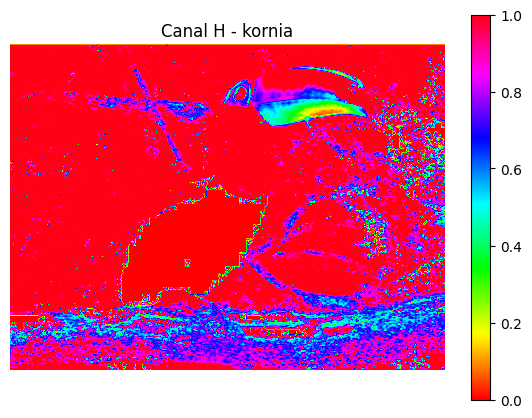

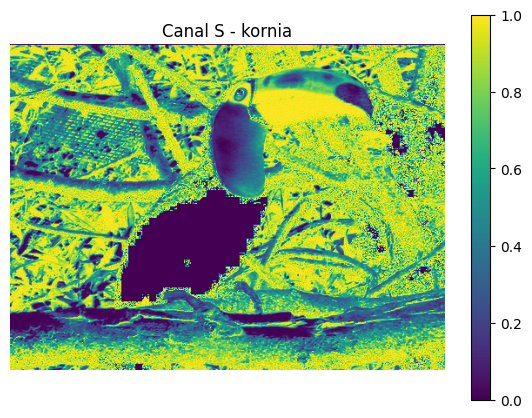

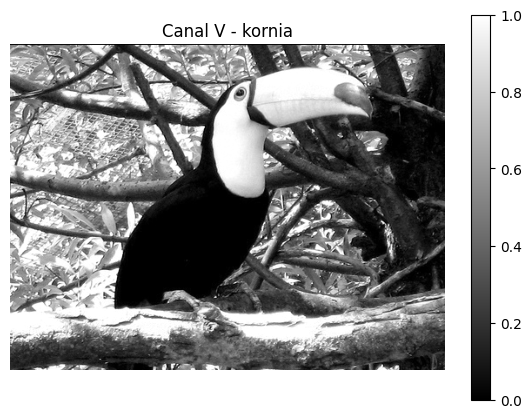

In [20]:
# RGB -> HSV
image_hsv = kornia.color.rgb_to_hsv(image_rgb_)

# Ajuster les valeurs de H, S, V dans l'intervalle [0, 1]
image_hsv[:, :, 0] = image_hsv[:, :, 0] / 360.0  # H dans [0, 1] (360 degrés)
image_hsv[:, :, 1:] = torch.clamp(image_hsv[:, :, 1:], min=0.0, max=1.0)  # S et V dans [0, 1]

# Permuter les dimensions pour l'affichage
image_hsv_ = image_hsv.squeeze(0).permute(1, 2, 0)

print('From RGB to HSV')
# Afficher les canaux séparément
show_channel(image_hsv_[:, :, 0], cmap='hsv', title='Canal H - kornia')
show_channel(image_hsv_[:, :, 1], cmap='viridis', title='Canal S - kornia')
show_channel(image_hsv_[:, :, 2], cmap='gray', title='Canal V - kornia')

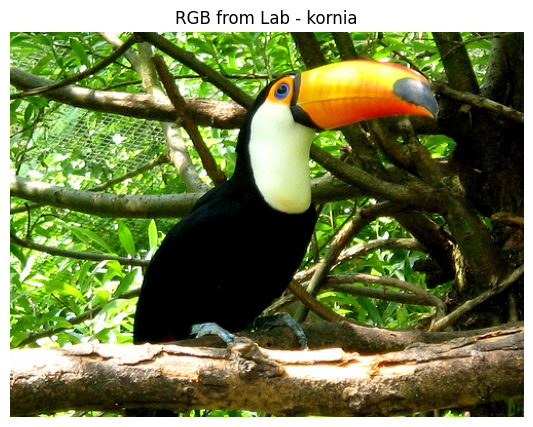

In [11]:
# Lab -> RGB
image_rgb_from_lab = kornia.color.lab_to_rgb(image_lab)
# Réorganiser les dimensions pour obtenir la forme (H, W, 3)
image_rgb_from_lab = image_rgb_from_lab.permute(0, 2, 3, 1).squeeze()

# Affichage
fig = plt.figure(figsize=(7, 5))
plt.title('RGB from Lab - kornia')
plt.imshow(image_rgb_from_lab.numpy())
plt.axis('off')
plt.show()

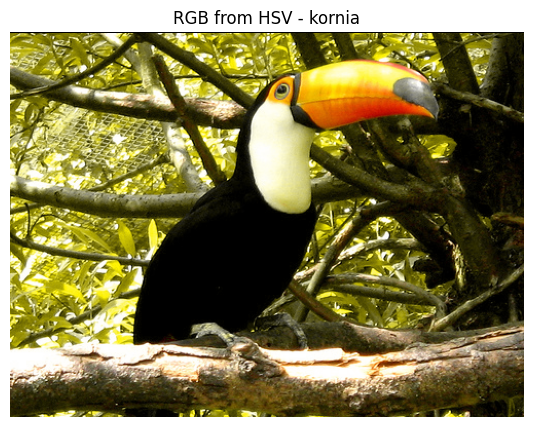

In [12]:
# HSV -> RGb
image_rgb_from_hsv = kornia.color.hsv_to_rgb(image_hsv)

# Normaliser les valeurs RGB pour l'affichage
image_rgb_normalized = image_rgb_from_hsv.squeeze(0).permute(1, 2, 0)  # Permuter les dimensions pour l'affichage (height, width, channels)
image_rgb_normalized = torch.clamp(image_rgb_normalized, min=0, max=1)  # Assurer que les valeurs sont dans [0, 1]

# Afficher l'image RGB
fig = plt.figure(figsize=(7, 5))
plt.title('RGB from HSV - kornia')
plt.imshow(image_rgb_normalized.numpy())
plt.axis('off')
plt.show()